# Data Preprocessing

**Example Dataset: Employee Performance Data**
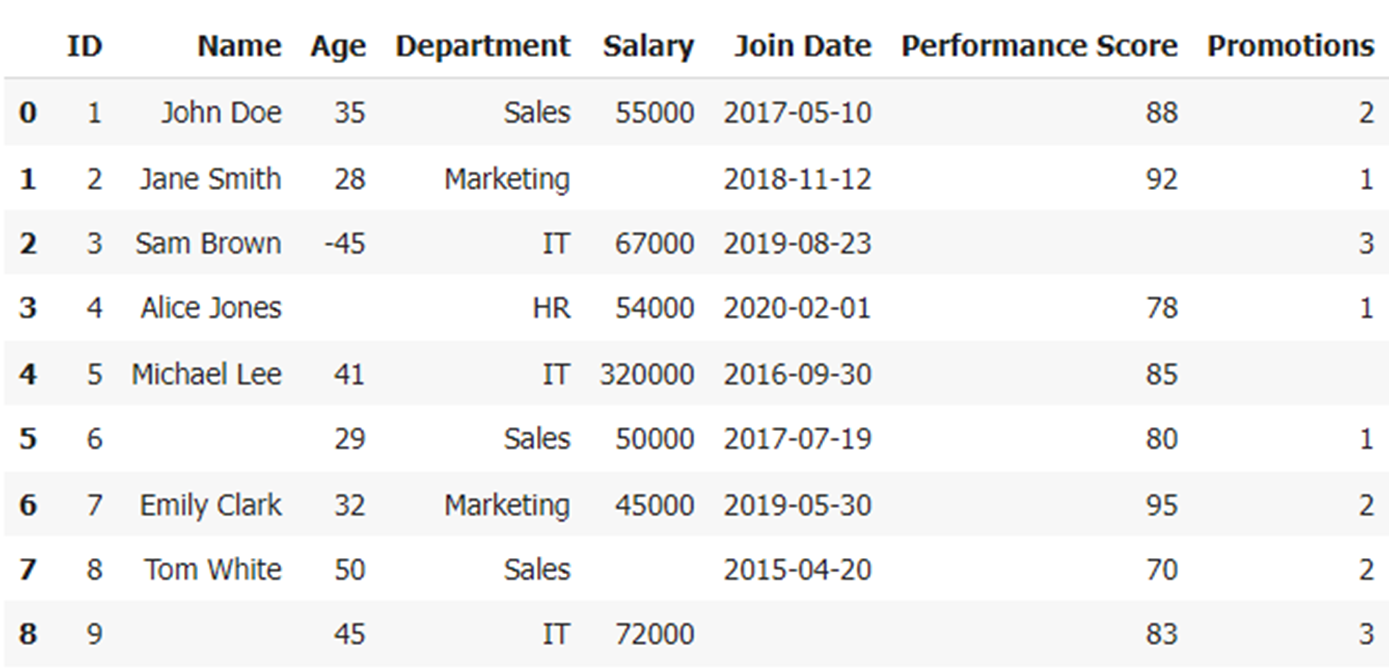

### **Issues in the Dataset**:
1. **Missing Values**:
   - "Salary" column has missing values for some employees.
   - "Performance Score" and "Promotions" columns have missing data.
   - Employee "Name" is missing for two entries.
   - "Join Date" is missing for one employee.

2. **Inconsistent Data**:
   - "Age" has a negative value (-45) which is invalid.
   - The "Promotions" column has missing or non-numeric values.

3. **Outliers**:
   - "Salary" of employee Michael Lee is abnormally high at 320,000, which could be an outlier.
   
4. **Data Type Issues**:
   - The "Join Date" column may need to be converted into a proper date format for consistency.

### **Key Steps in Data Preprocessing**

#### **1. Data Cleaning**:
   Data cleaning is an essential step to ensure the quality of the dataset before analysis or model development.

1. **Handling Missing Values**:
   - **Identification**: First, identify any missing values in the dataset. Missing data can lead to biased results or errors in the analysis.
   - **Dealing with Missing Values**:
     - **Remove incomplete records**: If the amount of missing data is small and doesn't impact analysis, remove the incomplete records.
     - **Imputation**: Estimate the missing data using statistical methods (mean, median, mode), or machine learning models.
     - **Flagging Missing Values**: In some cases, it is beneficial to create a new variable that flags whether the data was missing for better understanding.

2. **Removing Duplicates**:
   - **Identification of Duplicates**: Search for duplicate entries that occur when data is recorded multiple times, which can distort the analysis or lead to inaccurate results.
   - **Removal of Duplicates**: Once identified, duplicates can be removed while ensuring that necessary information is retained.

3. **Correcting Errors**:
   - **Detecting Errors**: Identify incorrect values or inconsistencies, such as typos (e.g., `Jon` instead of `John`), impossible values (e.g., negative age), or formatting errors.
   - **Fixing Errors**: Standardize entries and correct data where possible. For example, inconsistent date formats can be corrected using a uniform format like `YYYY-MM-DD`.
   - **Handling Outliers**: Outliers can either be valid extreme values or incorrect entries. Use techniques like the Interquartile Range (IQR) or Z-score to detect outliers and either correct or remove them based on the context.

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'Name': ['John Doe', 'Jane Smith', 'Sam Brown', 'Alice Jones', 'Michael Lee', '', 'Emily Clark', 'Tom White', ''],
    'Age': [35, 28, -45, '', 41, 29, 32, 50, 45],
    'Department': ['Sales', 'Marketing', 'IT', 'HR', 'IT', 'Sales', 'Marketing', 'Sales', 'IT'],
    'Salary': [55000, '', 67000, 54000, 320000, 50000, 45000, '', 72000],
    'Join Date': ['2017-05-10', '2018-11-12', '2019-08-23', '2020-02-01', '2016-09-30', '2017-07-19', '2019-05-30', '2015-04-20', ''],
    'Performance Score': [88, 92, '', 78, 85, 80, 95, 70, 83],
    'Promotions': [2, 1, 3, 1, '', 1, 2, 2, 3]
}

df = pd.DataFrame(data)
df

In [ ]:
# Identifying missing values
df.isnull().sum()

In [ ]:
data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'Name': ['John Doe', 'Jane Smith', 'Sam Brown', 'Alice Jones', 'Michael Lee', np.nan, 'Emily Clark', 'Tom White', np.nan],
    'Age': [35, 28, -45, np.nan, 41, 29, 32, 50, 45],
    'Department': ['Sales', 'Marketing', 'IT', 'HR', 'IT', 'Sales', 'Marketing', 'Sales', 'IT'],
    'Salary': [55000, np.nan, 67000, 54000, 320000, 50000, 45000, np.nan, 72000],
    'Join Date': ['2017-05-10', '2018-11-12', '2019-08-23', '2020-02-01', '2016-09-30', '2017-07-19', '2019-05-30', '2015-04-20', np.nan],
    'Performance Score': [88, 92, np.nan, 78, 85, 80, 95, 70, 83],
    'Promotions': [2, 1, 3, 1, np.nan, 1, 2, 2, 3]
}

df = pd.DataFrame(data)
df

In [ ]:
# Identifying missing values
df.isnull().sum()

In [ ]:
# Check if there are any missing values in each column
# Using .isna() or .isnull() with .any()
df.isna().any()

In [ ]:
# Using .info() Method
# Get a quick overview of missing values
df.info()

In [ ]:
# Using .notnull() and .isnull()
# Count non-missing values
df.notnull().sum()

In [ ]:
#Using .isnull().sum().sum() for Total Missing Values
# Total missing values in the entire dataset

df.isnull().sum().sum()

In [ ]:
# Using .isnull() with a Heatmap (Visualization)

import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

Methods to deal with missing value
1. Removal of Missing Values:
- Remove any rows or columns that contain missing values.
- Remove only the specific cases (i.e., values)
2. Imputation of Missing Values
- Replace missing values with the mean, median, or mode of the non-missing values.
- Replace with the previous or next valid value to fill in missing data.
- Estimate missing values based on the values of the nearest neighbors. (K nearest neighbors)
- Use a regression model to predict and fill in missing values based on other variables.

In [ ]:
import pandas as pd
import numpy as np

# Example dataset with missing values
data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'Name': ['John Doe', 'Jane Smith', 'Sam Brown', 'Alice Jones', 'Michael Lee', np.nan, 'Emily Clark', 'Tom White', np.nan],
    'Age': [35, 28, -45, np.nan, 41, 29, 32, 50, 45],
    'Department': ['Sales', 'Marketing', 'IT', 'HR', 'IT', 'Sales', 'Marketing', 'Sales', 'IT'],
    'Salary': [55000, np.nan, 67000, 54000, 320000, 50000, 45000, np.nan, 72000],
    'Join Date': ['2017-05-10', '2018-11-12', '2019-08-23', '2020-02-01', '2016-09-30', '2017-07-19', '2019-05-30', '2015-04-20', np.nan],
    'Performance Score': [88, 92, np.nan, 78, 85, 80, 95, 70, 83],
    'Promotions': [2, 1, 3, 1, np.nan, 1, 2, 2, 3]
}

df = pd.DataFrame(data)
df


## Removal of Missing Values


In [ ]:
# Remove rows with any missing values
df.dropna()

In [ ]:
df

In [ ]:
df_removed_rows = df.dropna()
df_removed_rows

In [ ]:
# Remove columns with any missing values
df.dropna(axis=1)


In [ ]:
# Remove rows where the "Age" column has missing values
df[df['Age'].notna()]

## Imputation of Missing Values

In [ ]:
# Replace Missing Values with Mean, Median, or Mode

# Impute missing "Age" with the mean
df_imputed_mean = df.copy()
df_imputed_mean['Age'].fillna(df_imputed_mean['Age'].mean(), inplace=True)
df_imputed_mean



In [ ]:
# Impute missing "Salary" with the median
df_imputed_median = df.copy()
df_imputed_median['Salary'].fillna(df_imputed_median['Salary'].median(), inplace=True)
df_imputed_median

In [ ]:
# Impute missing "Salary" with the mode
df_imputed_mode = df.copy()
df_imputed_mode['Salary'].fillna(df_imputed_mode['Salary'].mode()[0], inplace=True)
df_imputed_mode

In [ ]:
# Fill missing 'Name' values with 'Unknown'
df['Name'].fillna('Unknown', inplace=True)
df

##Replace Missing Values with Forward/Backward Fill


In [ ]:
# Forward fill (use previous valid value)
df_ffill = df.copy()
df_ffill.ffill()

In [ ]:
# Backward fill (use next valid value)
df_bfill = df.copy()
df_bfill.bfill()


##  Estimate Missing Values with K-Nearest Neighbors (KNN Imputation)

In [ ]:
# You can use the KNNImputer from sklearn to estimate missing values based on the nearest neighbors.
from sklearn.impute import KNNImputer

# K-Nearest Neighbors (KNN) Imputation
df_knn = df.copy()
imputer = KNNImputer(n_neighbors=2)
df_knn[['Age', 'Salary']] = imputer.fit_transform(df_knn[['Age', 'Salary']])

df_knn


## Predict Missing Values Using a Regression Model

In [ ]:
# This approach involves training a regression model to predict the missing values of one variable based on others.
from sklearn.linear_model import LinearRegression

# Impute missing "Salary" based on "Age" using regression
df_regression = df.copy()

# Drop rows where both Age and Salary are missing
df_regression.dropna(subset=['Age', 'Salary'], inplace=True)

# Separate complete and incomplete data
known = df_regression[df_regression['Salary'].notna()]
unknown = df[df['Salary'].isna()]
known_age = df[df['Age'].notna()]

# Step 3: Train the regression model using the known data
X_train = known[['Age']] # Predictor variable
y_train = known['Salary']  # Target variable

# Train a regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict missing salary values
X_test = known_age.loc[known_age['Salary'].isna(),['Age']]
known_age.loc[known_age['Salary'].isna(), 'Salary'] = model.predict(X_test)
known_age


In [ ]:
df

## **Methods to deal with missing value**
3. Interpolation:
- Estimate missing values by linear interpolation or polynomial interpolation
4. Using Domain Knowledge:
- Consult domain experts to make informed decisions about how to handle
missing values.
5. Flagging and Analysis:
- Create a new binary variable that flags whether a value is missing.
6. Doing Nothing (Leave missing value as is)

### Interpolation:

- Estimate missing values by linear interpolation or polynomial interpolation

In [ ]:
# 1. Apply linear interpolation to estimate missing values
df_linear = df.copy()
df_linear['Salary'] = df_linear['Salary'].interpolate(method='linear')
df_linear

In [ ]:
# 2. Apply polynomial interpolation (order 2) to estimate missing values
df_poly = df.copy()
df_poly['Salary'] = df_poly['Salary'].interpolate(method='polynomial', order=2)
df_poly

### **Data Transformation Techniques**

#### **1. Normalization/Standardization**

- **Normalization**: This scales the data to a range between 0 and 1, making all features have the same scale, especially useful when the range of values for different features varies widely.

  **Formula for Normalization**:
  
  \[
  X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}
  \]

- **Standardization**: This scales the data so that it has a mean of 0 and a standard deviation of 1, which makes the data easier to compare across variables with different units or scales.

  **Formula for Standardization**:
  
  \[
  Z = \frac{X - \mu}{\sigma}
  \]



In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd

# Example data
data = {'Age': [25, 40, 50, 60],
        'Salary': [50000, 60000, 80000, 90000]}

df = pd.DataFrame(data)

df

In [ ]:
# Normalization (scaling values between 0 and 1)
scaler = MinMaxScaler()
pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [ ]:
# Standardization (scaling to mean 0, std 1)
scaler_standard = StandardScaler()
pd.DataFrame(scaler_standard.fit_transform(df), columns=df.columns)

#### **2. Encoding Categorical Variables**

Categorical variables need to be converted into numerical values for use in machine learning models. There are two common methods:

- **Label Encoding**: Assigns a unique integer to each category.

- **One-Hot Encoding**: Creates binary columns for each category, where 1 indicates the presence of the category, and 0 indicates absence.




In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Example data
data = {'Gender': ['Male', 'Female', 'Female', 'Male'],
        'Department': ['HR', 'Finance', 'IT', 'Finance']}

df = pd.DataFrame(data)
df

In [ ]:
# Label Encoding for Gender
label_encoder = LabelEncoder()
df['Gender_LabelEncoded'] = label_encoder.fit_transform(df['Gender'])
df

In [ ]:
# One-Hot Encoding for Department
df_onehot = pd.get_dummies(df, columns=['Department'])
df_onehot

#### **3. Binning (Discretization)**

Binning is the process of transforming continuous variables into discrete categories. This is useful when the continuous variable's exact value is less important than the general range in which it falls.

For example, you can bin ages into categories like "Young," "Middle-aged," and "Senior."

**Example Code**:

```python
import pandas as pd

# Example data
data = {'Age': [22, 25, 47, 51, 37, 30, 55, 65, 45]}

df = pd.DataFrame(data)

# Binning Age into categories
bins = [0, 30, 50, 70]
labels = ['Young', 'Middle-aged', 'Senior']

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

print("Binned Data:\n", df)
```


In [ ]:
import pandas as pd

# Example data
data = {'Age': [22, 25, 47, 51, 37, 30, 55, 65, 45]}

df = pd.DataFrame(data)

# Binning Age into categories
bins = [0, 30, 50, 70]
labels = ['Young', 'Middle-aged', 'Senior']

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

df

### **Data Reduction**

Data reduction helps simplify the dataset by reducing the number of features (dimensionality) without losing much information. There are two common approaches:

1. **Feature Selection**: Selecting the most relevant features.
2. **Dimensionality Reduction**: Reducing the number of features using techniques like **Principal Component Analysis (PCA)**.


In [ ]:
import pandas as pd
import numpy as np

# Example dataset with multiple features
data = {
    'Age': [25, 32, 47, 51, 37, 29, 55, 65, 45],
    'Salary': [50000, 60000, 75000, 90000, 48000, 53000, 82000, 110000, 68000],
    'Performance Score': [88, 92, 85, 78, 85, 80, 95, 70, 83],
    'Promotions': [2, 1, 3, 1, 2, 1, 2, 3, 2],
    'Experience (Years)': [5, 7, 10, 12, 6, 4, 14, 16, 9]
}

df = pd.DataFrame(data)

# Display the dataset
df

### **1. Feature Selection**
Feature selection helps identify the most relevant features that contribute significantly to the target variable. We can use methods like correlation or statistical tests for this.




In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

features that have a strong correlation (positive or negative) with each other or the target variable can be considered for selection.

### **2. Dimensionality Reduction using PCA**
Principal Component Analysis (PCA) is a common technique used for dimensionality reduction. It transforms the original features into a smaller set of new features (principal components) that retain most of the variance in the data.



In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data before applying PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Apply PCA
pca = PCA(n_components=2)  # Reduce the dataset to 2 principal components
pca_result = pca.fit_transform(df_scaled)

# Create a DataFrame with the PCA results
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Display explained variance
print("Explained Variance by each Principal Component:", pca.explained_variance_ratio_)

# Display the PCA result
df_pca



### Exploratory Data Analysis (EDA)

Using the dataset presented in the image, here are some key steps and techniques that can be applied for **EDA**:

---

### **1. Overview of the Dataset**

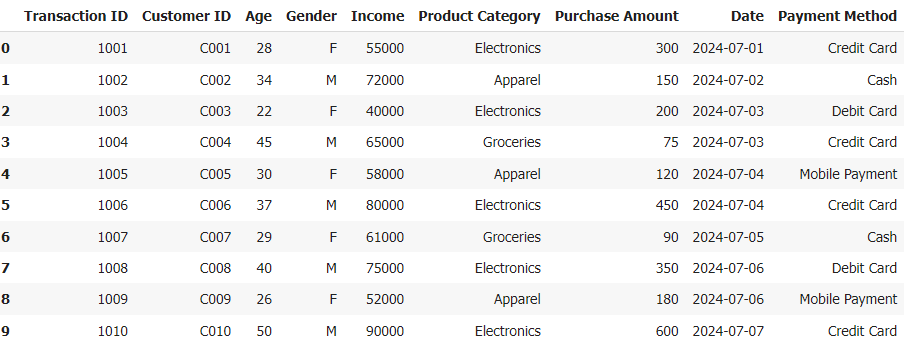

- The dataset contains 10 transactions with the following columns:
  - **Transaction ID**: A unique identifier for each transaction.
  - **Customer ID**: A unique identifier for each customer.
  - **Age**: Age of the customer.
  - **Gender**: Gender of the customer.
  - **Income**: Income of the customer.
  - **Product Category**: The type of product purchased.
  - **Purchase Amount**: The amount spent by the customer.
  - **Date**: The date when the transaction occurred.
  - **Payment Method**: The method of payment used.

---

### **2. Basic Statistics (Summary)**
**Goal**: Get an overview of the distribution of numerical data and categorical data.



In [ ]:
import pandas as pd

# Sample dataset based on the image (replace with actual dataset)
data = {
    'Transaction ID': [1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010],
    'Customer ID': ['C001', 'C002', 'C003', 'C004', 'C005', 'C006', 'C007', 'C008', 'C009', 'C010'],
    'Age': [28, 34, 22, 45, 30, 37, 29, 40, 26, 50],
    'Gender': ['F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M'],
    'Income': [55000, 72000, 40000, 65000, 58000, 80000, 61000, 75000, 52000, 90000],
    'Product Category': ['Electronics', 'Apparel', 'Electronics', 'Groceries', 'Apparel', 'Electronics', 'Groceries', 'Electronics', 'Apparel', 'Electronics'],
    'Purchase Amount': [300, 150, 200, 75, 120, 450, 90, 350, 180, 600],
    'Date': ['2024-07-01', '2024-07-02', '2024-07-03', '2024-07-03', '2024-07-04', '2024-07-04', '2024-07-05', '2024-07-06', '2024-07-06', '2024-07-07'],
    'Payment Method': ['Credit Card', 'Cash', 'Debit Card', 'Credit Card', 'Mobile Payment', 'Credit Card', 'Cash', 'Debit Card', 'Mobile Payment', 'Credit Card']
}

df = pd.DataFrame(data)

df

In [ ]:
# Get basic statistics of numerical columns
df.describe()

In [ ]:
# Get distribution of categorical columns
df['Gender'].value_counts()


In [ ]:
df['Product Category'].value_counts()


In [ ]:
df['Payment Method'].value_counts()

### **3. Visualizations**
Visualizations can help detect patterns, trends, and outliers.

- **Age Distribution**:
  - **Goal**: Visualize the age distribution of customers.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=5, kde=True)
plt.title('Age Distribution')
plt.show()

In [ ]:
# Distribution of Purchase Amount
df['Purchase Amount'].hist(bins=20)

In [ ]:
# Distribution of Income
df['Income'].hist(bins=20)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Income vs Purchase Amount
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Purchase Amount', data=df)
plt.title('Scatter Plot of Income vs. Purchase Amount')
plt.xlabel('Income')
plt.ylabel('Purchase Amount')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
# Now plot your scatter plot
plt.scatter(x=df['Income'],y=df['Purchase Amount'])
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the dataset is already loaded in df
# Calculate correlation matrix
corr_matrix = df[['Age', 'Income', 'Purchase Amount']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Age, Income, and Purchase Amount')
plt.show()


In [ ]:
df[['Age', 'Income', 'Purchase Amount']].corr()

The image shows a **correlation heatmap** for **Age**, **Income**, and **Purchase Amount**. The heatmap visually represents the correlation coefficients between these numerical variables. Higher correlation values (closer to 1) indicate stronger relationships between variables, while lower or negative values indicate weaker or inverse relationships.

### Key Observations from the Heatmap:
1. **Age and Income**: A correlation of **0.86**, indicating a strong positive relationship. This suggests that older individuals tend to have higher incomes in this dataset.
2. **Income and Purchase Amount**: A correlation of **0.67**, indicating a moderate positive relationship. Customers with higher incomes tend to spend more.
3. **Age and Purchase Amount**: A correlation of **0.51**, indicating a weak to moderate positive relationship. This suggests that older customers tend to spend more, but the correlation isn't as strong as income and purchase amount.


# Assignment 6



---

### **Assignment Instructions:**

Select **5 techniques** from the list below and apply them to the dataset. You must also perform **2 visualizations** as part of your EDA (Exploratory Data Analysis).

For each technique you select, **provide a brief explanation** of why you chose that specific technique for this dataset and how it helps improve the quality or understanding of the data.

---

### **Techniques to Apply:**

#### **1. Data Cleaning**:
- **Handling Missing Values**:
  - **Identification**: Identify the missing values in the dataset.
  - **Dealing with Missing Values**: Choose one of the following methods to deal with missing data:
    - Removal of missing values
    - Imputation of missing values (mean, median, or mode)
    - Interpolation (use linear interpolation to estimate missing values)

#### **2. Data Transformation Techniques**:
- **Normalization/Standardization**: Apply normalization or standardization to numerical columns like GPA, Study Hours per Week, and Family Income.

#### **3. Data Reduction**:
- **Feature Selection**: Remove any unnecessary columns or combine features that add little value to the analysis.
- **Dimensionality Reduction**: Optionally apply PCA (Principal Component Analysis) to reduce the number of features in the dataset.

#### **4. Exploratory Data Analysis (EDA)**:
- **Basic Statistics**: Perform descriptive analysis to understand the central tendencies (mean, median) and dispersion (variance, standard deviation) of the data.
- **Correlation Analysis**: Identify any relationships between numerical variables (e.g., GPA, Study Hours, Family Income).

### **Visualizations (Choose at least 2)**:
- **Histogram**: Visualize the distribution of numerical data like GPA, Study Hours, or Family Income.
- **Box Plot**: Identify outliers in variables like GPA or Family Income.
- **Scatter Plot**: Visualize the relationship between two numerical variables, such as GPA and Study Hours.
- **Bar Plot**: Display counts of categorical variables like Gender or Department.
- **Heatmap**: Show correlations between numerical variables like GPA, Family Income, Study Hours, etc.

---





In [ ]:
# Assignment Dataset:

import pandas as pd
import numpy as np

# Creating a dataset with various opportunities for data cleaning, transformation, and analysis
data = {
    'Student ID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'Name': ['Alice', 'Bob', np.nan, 'David', 'Eva', 'Frank', 'Grace', np.nan, 'Ivy', 'Jack'],
    'Age': [23, 21, 25, np.nan, 22, 24, 27, 26, np.nan, 28],
    'Gender': ['F', 'M', 'F', 'M', 'F', np.nan, 'F', 'M', 'F', 'M'],
    'Department': ['Engineering', 'Business', 'Arts', 'Engineering', 'Business', 'Arts', 'Engineering', 'Business', np.nan, 'Arts'],
    'GPA': [3.5, 3.7, np.nan, 2.8, 3.2, 3.1, 3.8, 3.6, np.nan, 3.9],
    'Study Hours per Week': [15, 10, np.nan, 25, 20, 15, 18, 22, 30, 25],
    'Scholarship': ['Yes', 'No', 'Yes', 'No', np.nan, 'Yes', 'No', 'Yes', 'No', 'Yes'],
    'Extracurricular Activities': [np.nan, 3, 4, 2, 0, np.nan, 5, 1, 4, 2],
    'Family Income ($)': [50000, 62000, 48000, 55000, np.nan, 58000, 60000, 49000, 52000, 67000],
    'Graduation Year': [2024, 2024, 2025, np.nan, 2025, 2023, 2023, 2024, np.nan, 2025]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the dataset
df
